## importing required library

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set(color_codes=True)

sns.set_theme()

## lazy evaluation

In [2]:
import dask.dataframe as dd

from dask.diagnostics import ProgressBar

In [3]:
df2013_14 = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv')

df2015 = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2015.csv')

df2016 = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2016.csv')

df2017 = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2017.csv')

In [4]:
df2016 = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2016.csv', nrows = 100000  , low_memory=False)

In [5]:
df2016

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1363745270,GGY6450,99,PAS,07/09/2015,46,SDN,HONDA,P,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1363745293,KXD355,SC,PAS,07/09/2015,21,SUBN,CHEVR,P,55730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1363745438,JCK7576,PA,PAS,07/09/2015,21,SDN,ME/BE,P,42730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1363745475,GYK7658,NY,OMS,07/09/2015,21,SUBN,NISSA,P,58130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1363745487,GMT8141,NY,PAS,07/09/2015,21,P-U,LINCO,P,58130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5087139693,GVR7734,NY,PAS,07/05/2015,7,4DSD,FORD,V,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,5087139700,JVW4615,PA,PAS,07/05/2015,7,SDN,BMW,V,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,5087139735,GW127,RI,PAS,07/05/2015,7,NaN,VOLVO,V,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,5087139760,JWM2985,PA,PAS,07/05/2015,7,SDN,NISSA,V,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## lets have look into 2016 data

In [6]:
df2016.head(3)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1363745270,GGY6450,99,PAS,07/09/2015,46,SDN,HONDA,P,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1363745293,KXD355,SC,PAS,07/09/2015,21,SUBN,CHEVR,P,55730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1363745438,JCK7576,PA,PAS,07/09/2015,21,SDN,ME/BE,P,42730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  So in the 2016 dataset there are about 10.6 million entries for parking ticket, and each entry has 51 columns.

## Lets take a look at the number of unique values for each column name...

In [7]:
d = {'Unique Entry': df2016.nunique(axis = 0),
        'Nan Entry': df2016.isnull().any()}

pd.DataFrame(data = d, index = df2016.columns.values)

,Unique Entry,Nan Entry
Summons Number,100000,False
Plate ID,88032,False
Registration State,60,False
Plate Type,34,False
Issue Date,287,False
Violation Code,87,False
Vehicle Body Type,284,True
Vehicle Make,426,True
Issuing Agency,16,False
Street Code1,3098,False


## As it turns out , the last 11 columns in this dataset has no entry. So we can ignore those columns, while carrying out any visualization operation in this dataframe.

In [8]:
drop_column = ['No Standing or Stopping Violation', 'Hydrant Violation',
               'Double Parking Violation', 'Latitude', 'Longitude',
               'Community Board', 'Community Council ', 'Census Tract', 'BIN',
               'BBL', 'NTA',
               'Street Code1', 'Street Code2', 'Street Code3','Meter Number', 'Violation Post Code',
                'Law Section', 'Sub Division', 'House Number', 'Street Name']

df2016.drop(drop_column, axis = 1, inplace = True)

In [9]:
drop_row = ['Plate ID']

df2016.dropna(axis = 0, how = 'any', subset = drop_row, inplace = True)

## Check if there is anymore rows left without a Plate ID.

In [10]:
df2016['Plate ID'].isnull().any()

False

In [11]:
df2016.shape

(100000, 31)

# But this is still a lot of data points. I does not make sense to use all of them to get an idea of distribution of the data points. So for visualization I will use only 0.1% of the whole data.

In [12]:
data2016 = df2016.sample(frac = 0.1, replace = False)

In [13]:
data2016.head(2)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Vehicle Expiration Date,...,Date First Observed,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Feet From Curb,Violation Description
53333,4608313873,GXS7898,NY,PAS,06/19/2015,36,SUBN,NISSA,V,0,...,0,T,NaN,NaN,NaN,GY,NaN,2012,0,PHTO SCHOOL ZN SPEED VIOLATION
67820,4608600310,T428248C,NY,OMT,07/10/2015,36,SUBN,LINCO,V,0,...,0,T,NaN,NaN,NaN,BK,NaN,2011,0,PHTO SCHOOL ZN SPEED VIOLATION


# barplot of column "registration state"

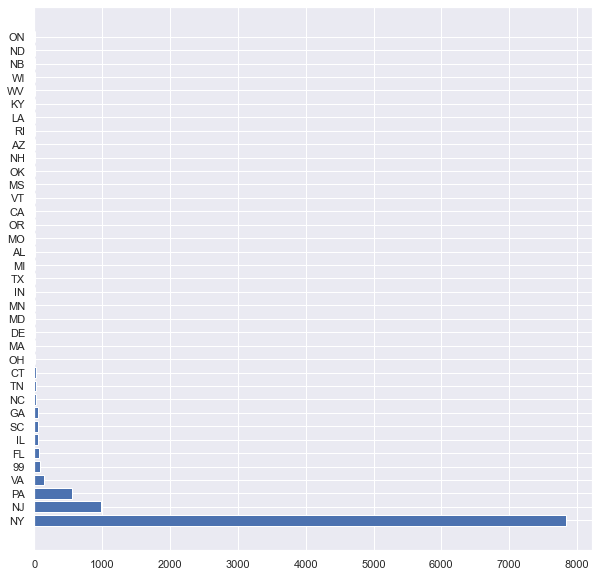

In [14]:
x_val = data2016['Registration State'].value_counts().index

heights = data2016['Registration State'].value_counts()

y_pos = np.arange(len(x_val))

fig = plt.figure(figsize=(10,10)) 

# Create horizontal bars

plt.barh(y_pos, heights)
 
# Create names on the y-axis

plt.yticks(y_pos, x_val)
 
# Show graphic

plt.show()

In [15]:
pd.DataFrame(data2016['Registration State'].value_counts()/len(data2016)).nlargest(10, columns = ['Registration State'])

,Registration State
NY,0.7836
NJ,0.0985
PA,0.0560
VA,0.0136
99,0.0078
FL,0.0060
IL,0.0053
SC,0.0051
GA,0.0047
NC,0.0028


## How the number of tickets given changes with each month?

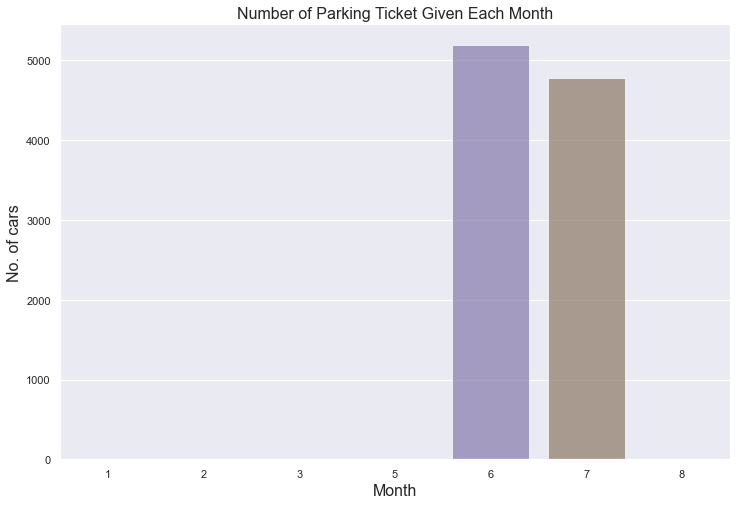

In [16]:
month = []
for time_stamp in pd.to_datetime(data2016['Issue Date']):
    month.append(time_stamp.month)
m_count = pd.Series(month).value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y = m_count.values, x = m_count.index, alpha=0.7)
plt.title("Number of Parking Ticket Given Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show()

## Parking ticket vs country

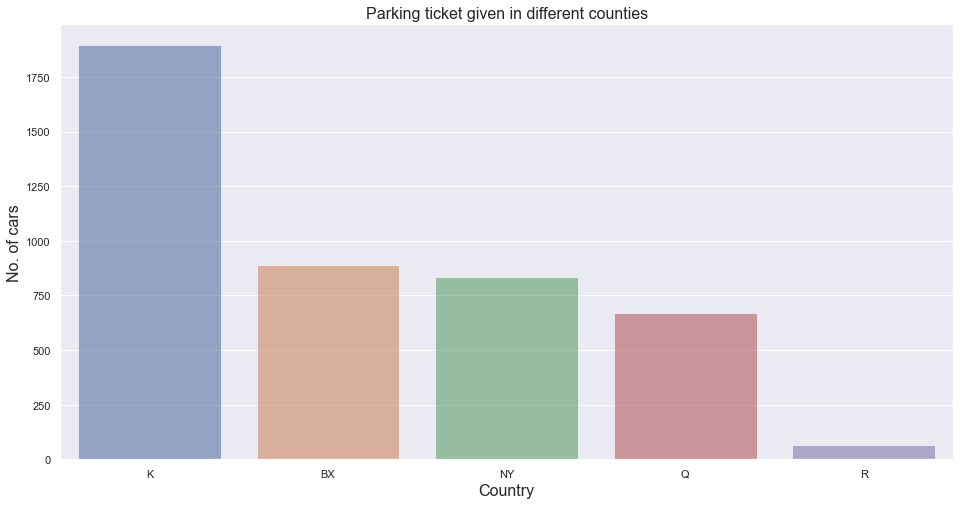

In [17]:
violation_county = data2016['Violation County'].value_counts()

plt.figure(figsize=(16,8))
f = sns.barplot(y=violation_county.values, x=violation_county.index, alpha=0.6)
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Country', fontsize=16);
plt.title('Parking ticket given in different counties', fontsize=16);

## Vehicle Year

In [18]:
pd.DataFrame(data2016['Vehicle Year'].value_counts()).nlargest(10, columns = ['Vehicle Year'])

,Vehicle Year
0,1536
2015,1159
2014,1127
2013,951
2012,601
2011,484
2007,418
2005,413
2006,391
2004,387


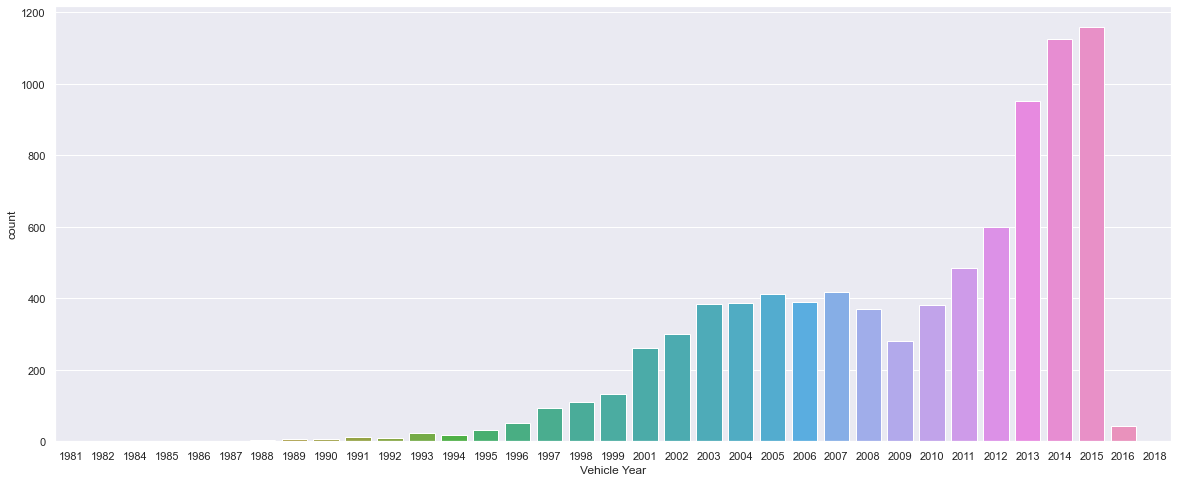

In [19]:
plt.figure(figsize=(20,8))

sns.countplot(x = 'Vehicle Year', data = data2016.loc[(data2016['Vehicle Year']>1980) & (data2016['Vehicle Year'] <= 2018)]);

## By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

C:\Users\Karan khatri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Karan khatri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Karan khatri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Karan khatri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Karan khatri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Karan khatri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 var

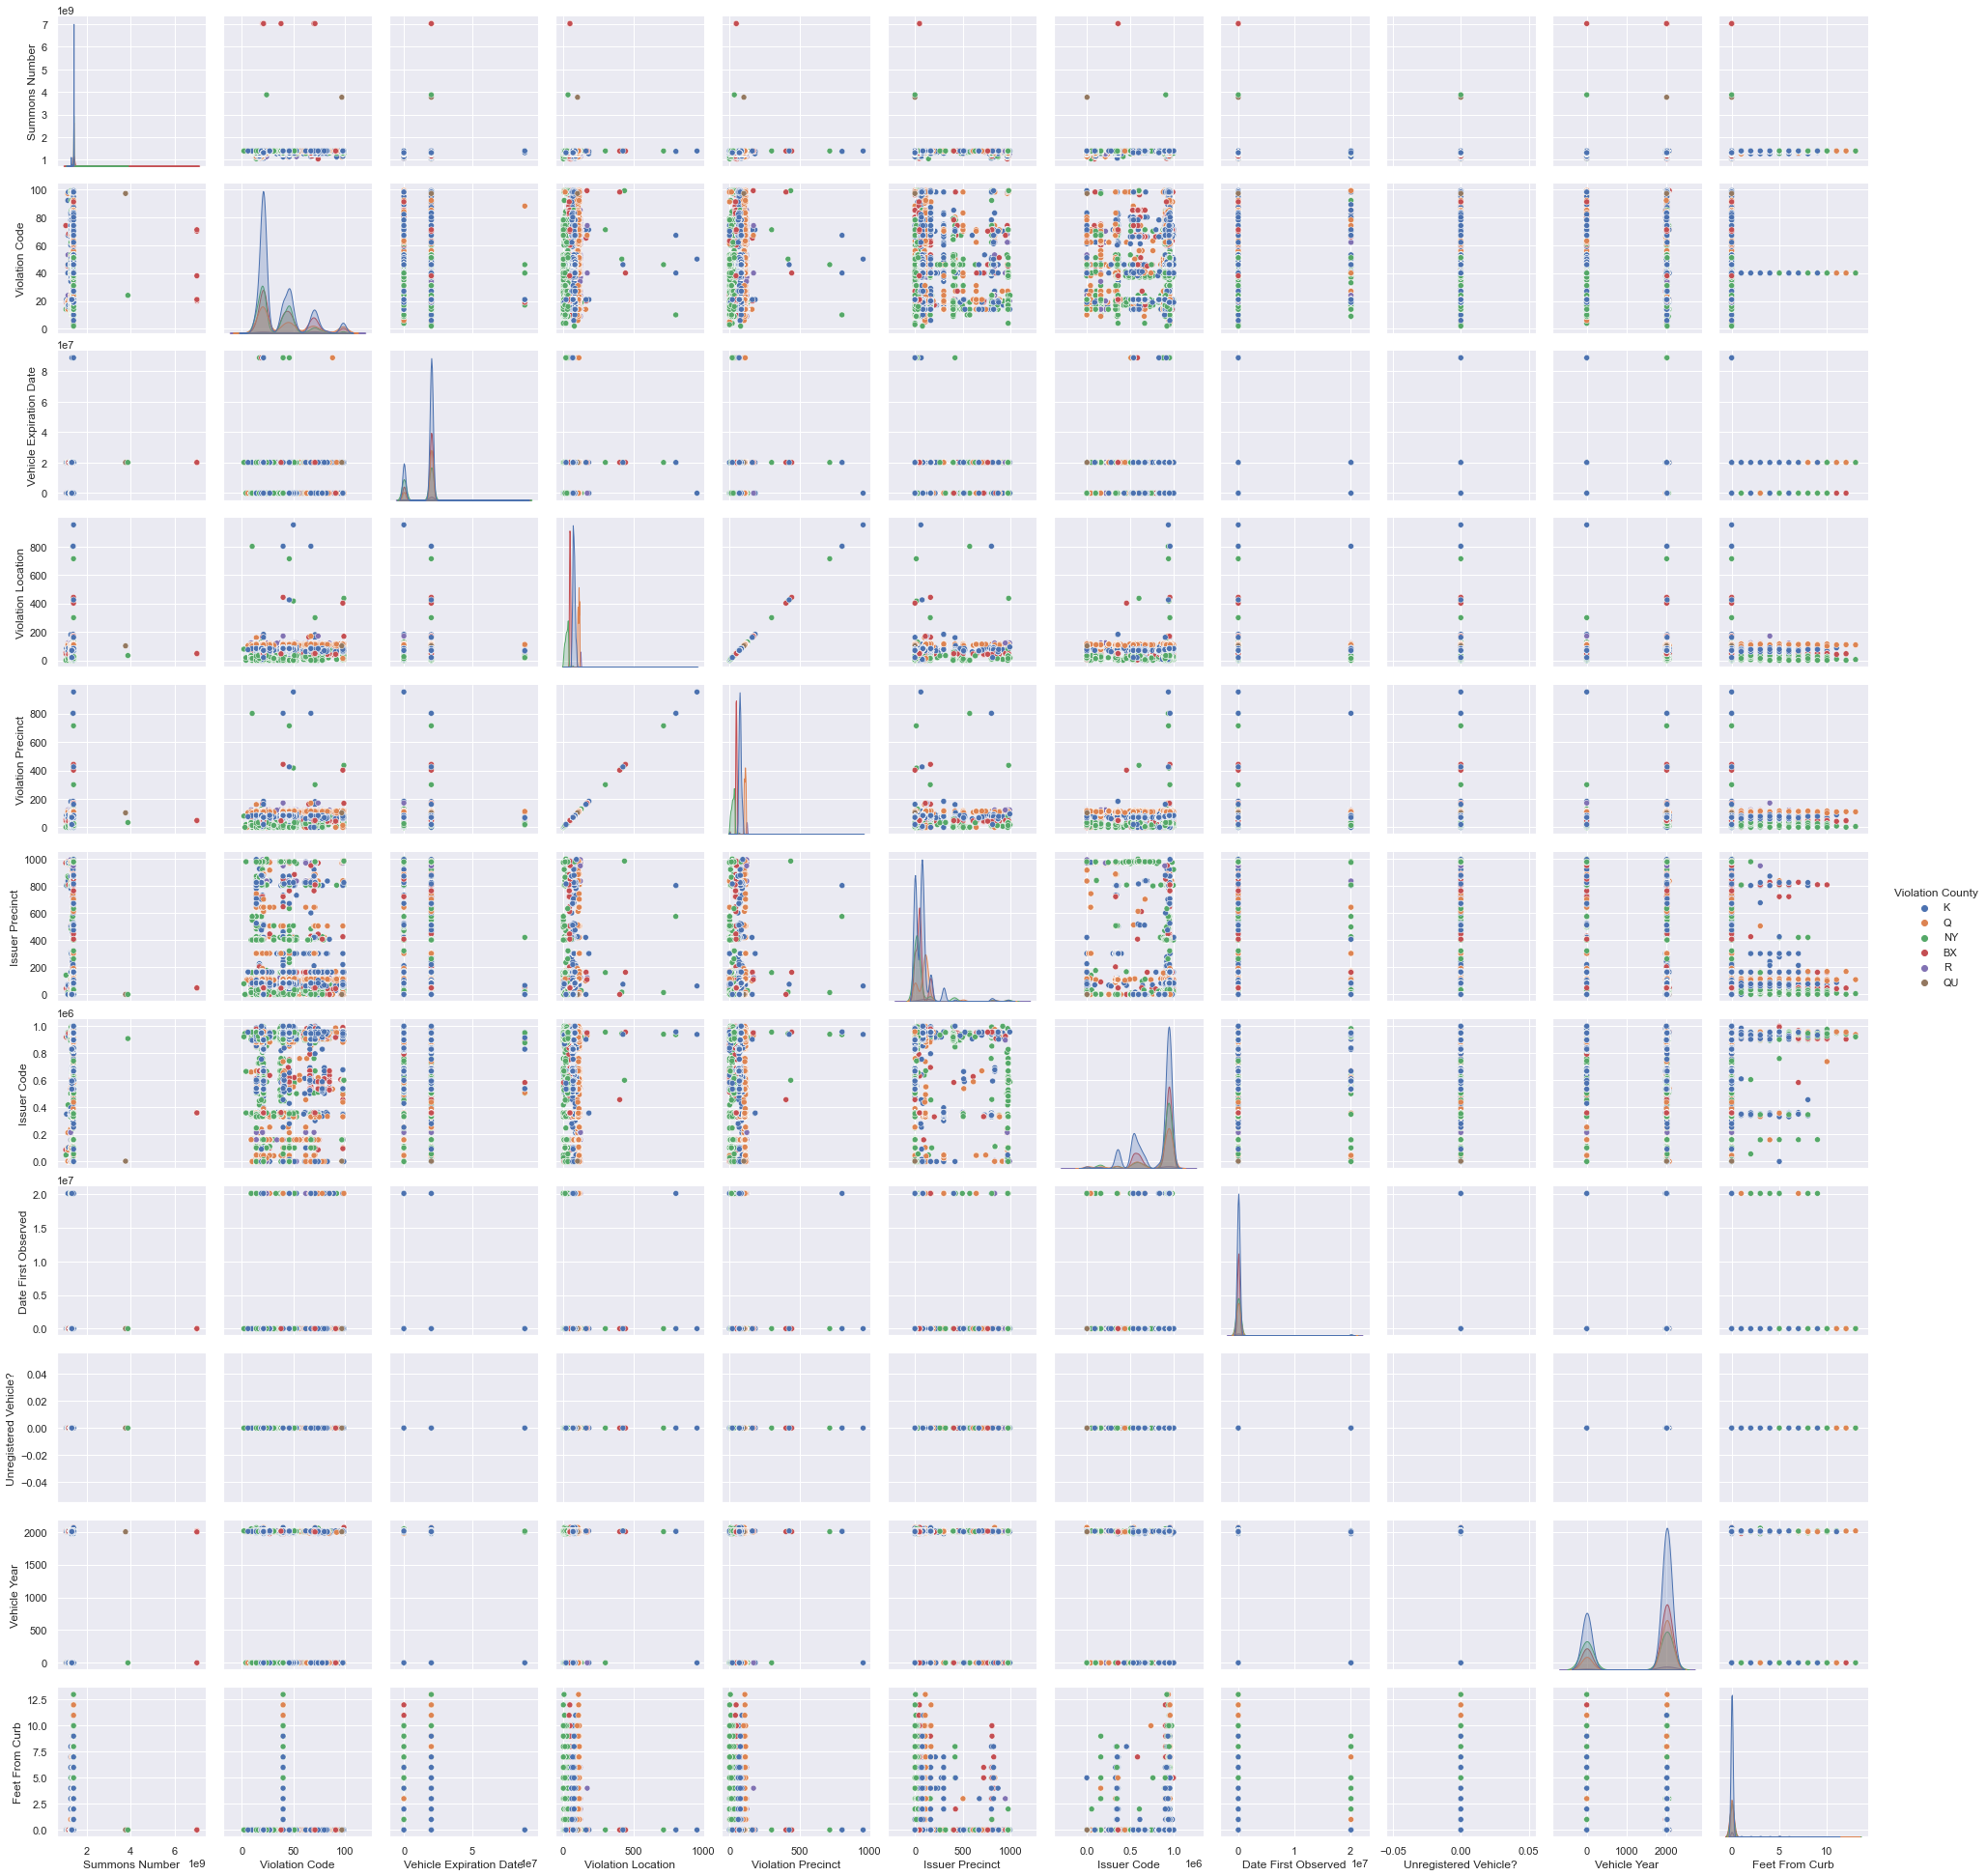

In [20]:
sns.pairplot(df2016, hue="Violation County")

## the above pairplot shows a subset of variables for violation country and it's different states 

## Let's have look into data 2013_14

In [27]:
df2013_14 = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv', nrows = 100000  , low_memory=False)

In [28]:
df2013_14.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df2013_14.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'Latitude', 'Longitude', 'Comm

## #grouping the data by Registration State and counting the number of tickets issued

In [30]:
x = df2013_14.groupby(by='Registration State',as_index=False).count()
x.head()

,Registration State,Summons Number,Plate ID,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,99,1492,1491,1492,1492,1492,1376,1249,1492,1492,...,0,0,0,0,0,0,0,0,0,0
1,AK,8,8,8,8,8,7,6,8,8,...,0,0,0,0,0,0,0,0,0,0
2,AL,50,50,50,50,50,48,48,50,50,...,0,0,0,0,0,0,0,0,0,0
3,AR,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,0,0,0,0
4,AZ,24,24,24,24,24,24,23,24,24,...,0,0,0,0,0,0,0,0,0,0


##  selecting the columns for further analysis 

In [31]:
y = df2013_14[['Registration State','Summons Number']]
y.head()

,Registration State,Summons Number
0,NY,1283294138
1,NY,1283294151
2,NY,1283294163
3,NY,1283294175
4,NY,1283294187


##  From this we can conclude, that the countries like NB, DC , BC , NS , MX and WY had issued less number of tickets in comparison of other countries

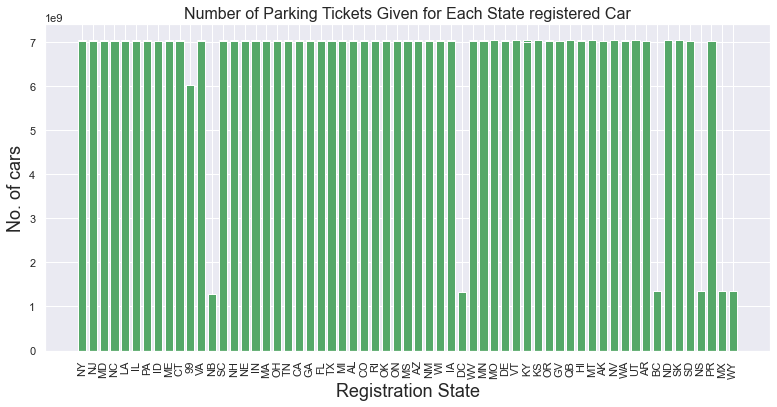

In [32]:
plt.figure(figsize=(13,6))
x = df2013_14['Summons Number']
y = df2013_14['Registration State']

plt.bar(y,x, color = 'g', width = 0.75)
plt.xticks( rotation=90)

plt.title("Number of Parking Tickets Given for Each State registered Car", fontsize=16)
plt.xlabel("Registration State", fontsize=18)
plt.ylabel("No. of cars", fontsize=18)

#show graphic
plt.show()

## extract month from Issue Date

In [33]:
df2013_14['date'] = pd.to_datetime(df2013_14['Issue Date']) # Convert date to datetime
df2013_14['month'] = df2013_14['date'].dt.month

In [34]:
df2013_14.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,date,month
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-04,8
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-04,8
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-05,8
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-05,8
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-08,8


## NY data for all months

In [35]:
ny_city = df2013_14[df2013_14['Registration State']=='NY'] 

month_grp = ny_city.groupby(by=ny_city['month'],as_index=False).count() #group NY data for each month
month_grp.head()

month_grp_nycity = month_grp[['month','Summons Number']]
month_grp_nycity

,month,Summons Number
0,1,10
1,2,5
2,3,7
3,4,13
4,5,27
5,6,928
6,7,34186
7,8,35852
8,9,27
9,10,4


## group other cities data for all the months

In [39]:
tikt_othercity = df2013_14[df2013_14['Registration State']!='NY'] # other cities data for all months

month_grp_othercity = tikt_othercity.groupby(by=tikt_othercity['month'],as_index=False).count()
month_grp_othercity.head()

month_grp_othercity_sel = month_grp_othercity[['month','Summons Number']]
month_grp_othercity_sel

,month,Summons Number
0,1,3
1,2,4
2,3,5
3,4,8
4,5,13
5,6,376
6,7,13963
7,8,14550
8,9,11
9,10,2


## comparing the number of cars issued in the entire year for New York vs other cities

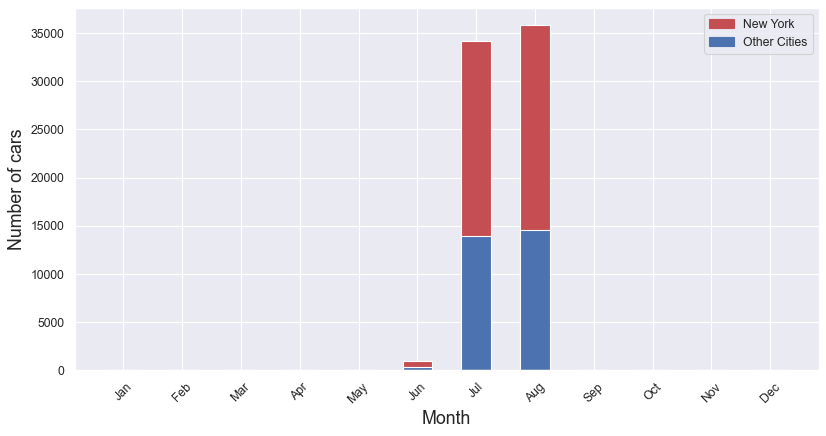

In [43]:
import matplotlib.patches as mpatches

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='g') #size of the plot

labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
plt.bar(month_grp_nycity['month'] , month_grp_nycity['Summons Number'], color = 'r', width = 0.5) # plotting the graph
plt.bar(month_grp_othercity_sel['month'], month_grp_othercity_sel['Summons Number'], color = 'b', width = 0.5)
plt.xticks(month_grp_nycity['month'], labels, rotation=45) #providing xticks to the graph

blue_patch = mpatches.Patch(color='r',label='New York') 
green_patch = mpatches.Patch(color='b',label='Other Cities')
plt.legend(handles=[blue_patch,green_patch]) #providing the labels
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of cars',fontsize=16)
plt.show()